# EDA Notebook

## Diabetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_df = pd.read_csv('data/ml_data/diabetes_data.csv')

print(diabetes_df.shape)
diabetes_df.head()

(70692, 18)


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

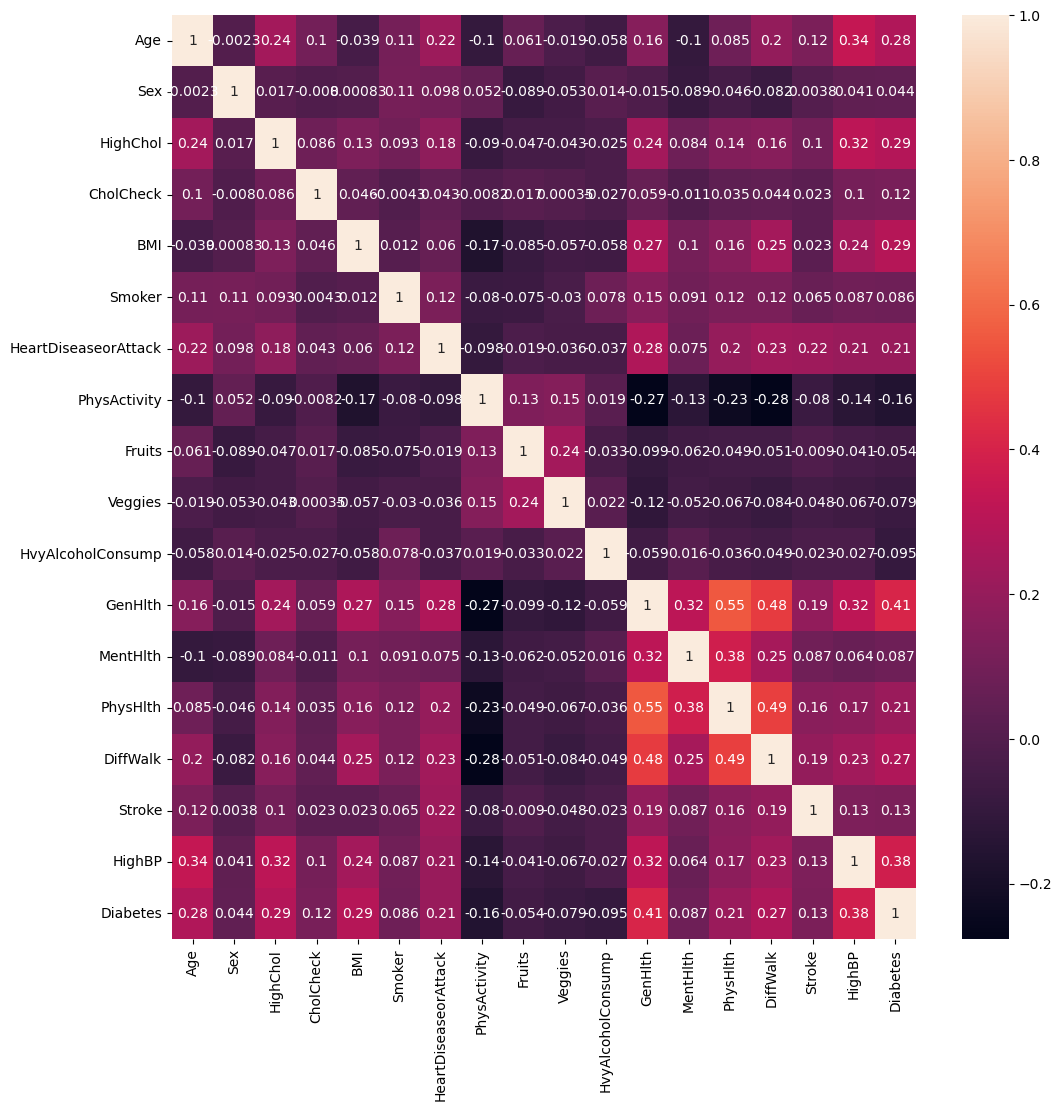

In [4]:
corrs = diabetes_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corrs, annot=True)
plt.show()

In [5]:
diabetes_df[['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth']].describe()

,Age,BMI,GenHlth,MentHlth,PhysHlth
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,29.856985,2.837082,3.752037,5.810417
std,2.852153,7.113954,1.113565,8.155627,10.062261
min,1.000000,12.000000,1.000000,0.000000,0.000000
25%,7.000000,25.000000,2.000000,0.000000,0.000000
50%,9.000000,29.000000,3.000000,0.000000,0.000000
75%,11.000000,33.000000,4.000000,2.000000,6.000000
max,13.000000,98.000000,5.000000,30.000000,30.000000


<Axes: >

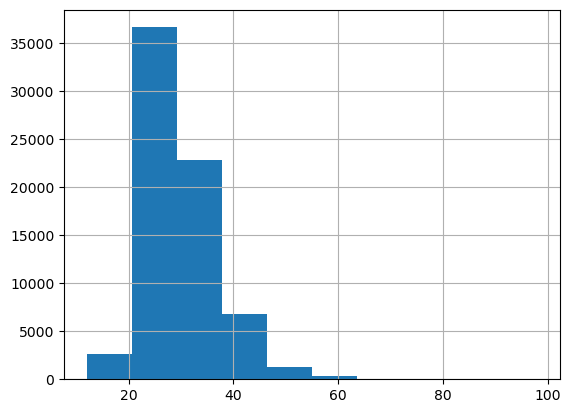

In [6]:
diabetes_df['BMI'].hist()

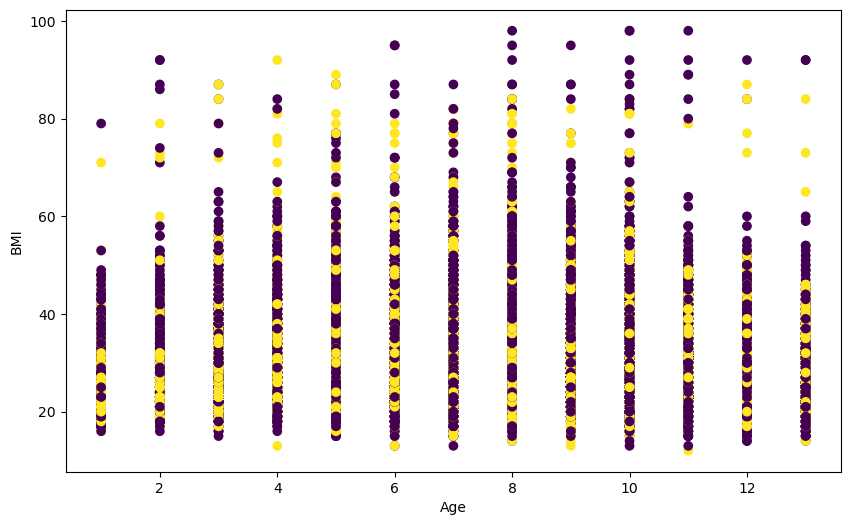

In [7]:
plt.figure(figsize=(10, 6))

plt.scatter(x=diabetes_df['Age'], y=diabetes_df['BMI'], c=diabetes_df['Sex'])

plt.xlabel('Age')
plt.ylabel('BMI')

plt.show()

In [8]:
diabetes_df['Age'].groupby(diabetes_df.Age).value_counts()

Age   Age 
1.0   1.0       979
2.0   2.0      1396
3.0   3.0      2049
4.0   4.0      2793
5.0   5.0      3520
6.0   6.0      4648
7.0   7.0      6872
8.0   8.0      8603
9.0   9.0     10112
10.0  10.0    10856
11.0  11.0     8044
12.0  12.0     5394
13.0  13.0     5426
Name: count, dtype: int64

In [9]:
diabetes_df['HvyAlcoholConsump'].loc[diabetes_df['HvyAlcoholConsump'] == 1].groupby(diabetes_df['Age']).value_counts()

Age   HvyAlcoholConsump
1.0   1.0                   82
2.0   1.0                   93
3.0   1.0                  125
4.0   1.0                  169
5.0   1.0                  194
6.0   1.0                  231
7.0   1.0                  355
8.0   1.0                  398
9.0   1.0                  404
10.0  1.0                  441
11.0  1.0                  271
12.0  1.0                  141
13.0  1.0                  116
Name: count, dtype: int64

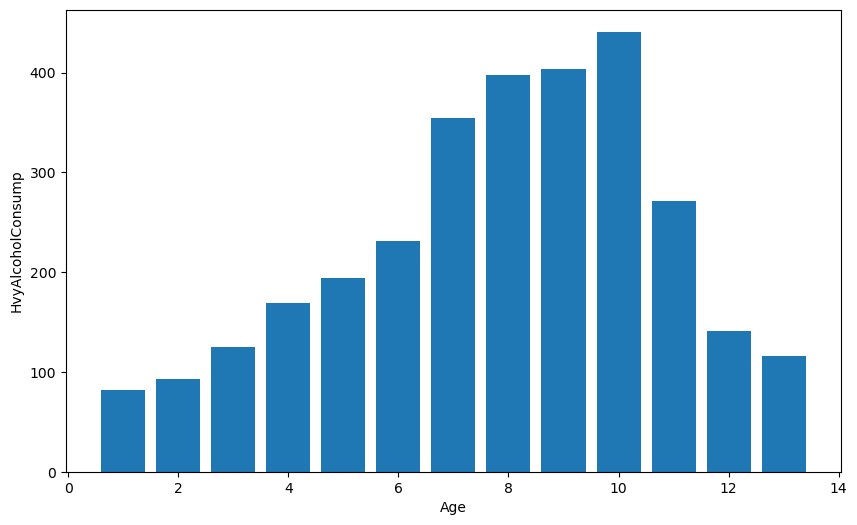

In [10]:
plt.figure(figsize=(10, 6))

ages = diabetes_df['Age'].groupby(diabetes_df.Age).value_counts().index
ages = [int(x[1]) for x in ages]
heavy_alcohol_consumption = diabetes_df['HvyAlcoholConsump'].loc[diabetes_df['HvyAlcoholConsump'] == 1].groupby(diabetes_df['Age']).value_counts().values


plt.bar(ages, heavy_alcohol_consumption)
plt.xlabel('Age')
plt.ylabel('HvyAlcoholConsump')

plt.show()

In [11]:
diabetes_df['Diabetes'].value_counts()

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

In [12]:
diabetes_df['Stroke'].value_counts()

Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64

In [13]:
diabetes_df['HeartDiseaseorAttack'].value_counts()

HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64

In [14]:
diabetes_df['HighBP'].value_counts()

HighBP
1.0    39832
0.0    30860
Name: count, dtype: int64

In [24]:
tab_df = diabetes_df.copy()

In [25]:
tab_df["Sex"] = tab_df["Sex"].map({0: "Female", 1: "Male"})
tab_df["HighChol"] = tab_df["HighChol"].map({0: "No", 1: "Yes"})
tab_df["CholCheck"] = tab_df["CholCheck"].map({0: "No", 1: "Yes"})
tab_df["Smoker"] = tab_df["Smoker"].map({0: "No", 1: "Yes"})
tab_df["HeartDiseaseorAttack"] = tab_df["HeartDiseaseorAttack"].map({0: "No", 1: "Yes"})
tab_df["PhysActivity"] = tab_df["PhysActivity"].map({0: "No", 1: "Yes"})
tab_df["Fruits"] = tab_df["Fruits"].map({0: "No", 1: "Yes"})
tab_df["Veggies"] = tab_df["Veggies"].map({0: "No", 1: "Yes"})
tab_df["HvyAlcoholConsump"] = tab_df["HvyAlcoholConsump"].map({0: "No", 1: "Yes"})
tab_df["GenHlth"] = tab_df["GenHlth"].map({1: "Excellent", 2: "Very good", 3: "Good", 4: "Fair", 5: "Poor"})
tab_df["Diabetes"] = tab_df["Diabetes"].map({0: "No", 1: "Yes"})
tab_df["DiffWalk"] = tab_df["DiffWalk"].map({0: "No", 1: "Yes"})
tab_df["Stroke"] = tab_df["Stroke"].map({0: "No", 1: "Yes"})
tab_df["HighBP"] = tab_df["HighBP"].map({0: "No", 1: "Yes"})

tab_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,Male,No,Yes,26.0,No,No,Yes,No,Yes,No,Good,5.0,30.0,No,No,Yes,No
1,12.0,Male,Yes,Yes,26.0,Yes,No,No,Yes,No,No,Good,0.0,0.0,No,Yes,Yes,No
2,13.0,Male,No,Yes,26.0,No,No,Yes,Yes,Yes,No,Excellent,0.0,10.0,No,No,No,No
3,11.0,Male,Yes,Yes,28.0,Yes,No,Yes,Yes,Yes,No,Good,0.0,3.0,No,No,Yes,No
4,8.0,Female,No,Yes,29.0,Yes,No,Yes,Yes,Yes,No,Very good,0.0,0.0,No,No,No,No


In [26]:
tab_df["Age"] = tab_df["Age"].map({1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39", 5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59", 9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79", 13: "80+"})

In [27]:
tab_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,35-39,Male,No,Yes,26.0,No,No,Yes,No,Yes,No,Good,5.0,30.0,No,No,Yes,No
1,75-79,Male,Yes,Yes,26.0,Yes,No,No,Yes,No,No,Good,0.0,0.0,No,Yes,Yes,No
2,80+,Male,No,Yes,26.0,No,No,Yes,Yes,Yes,No,Excellent,0.0,10.0,No,No,No,No
3,70-74,Male,Yes,Yes,28.0,Yes,No,Yes,Yes,Yes,No,Good,0.0,3.0,No,No,Yes,No
4,55-59,Female,No,Yes,29.0,Yes,No,Yes,Yes,Yes,No,Very good,0.0,0.0,No,No,No,No


In [30]:
tab_df[["MentHlth", "PhysHlth", "BMI"]] = tab_df[["MentHlth", "PhysHlth", "BMI"]].astype(int)
tab_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,35-39,Male,No,Yes,26,No,No,Yes,No,Yes,No,Good,5,30,No,No,Yes,No
1,75-79,Male,Yes,Yes,26,Yes,No,No,Yes,No,No,Good,0,0,No,Yes,Yes,No
2,80+,Male,No,Yes,26,No,No,Yes,Yes,Yes,No,Excellent,0,10,No,No,No,No
3,70-74,Male,Yes,Yes,28,Yes,No,Yes,Yes,Yes,No,Good,0,3,No,No,Yes,No
4,55-59,Female,No,Yes,29,Yes,No,Yes,Yes,Yes,No,Very good,0,0,No,No,No,No


In [32]:
tab_df.to_csv('data/tableau_data/clean_diabetes_data.csv')

Pretty good. Needs to be cleaned up for visualizations. Drop Sex, Smoker, Fruits, Veggies, HvyAlcoholConsump, and MentHlth for ML.

## Hypertension

In [15]:
ht_df = pd.read_csv('data/ml_data/hypertension_data.csv')

In [16]:
print(ht_df.shape)
ht_df.head()

(26083, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
ht_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


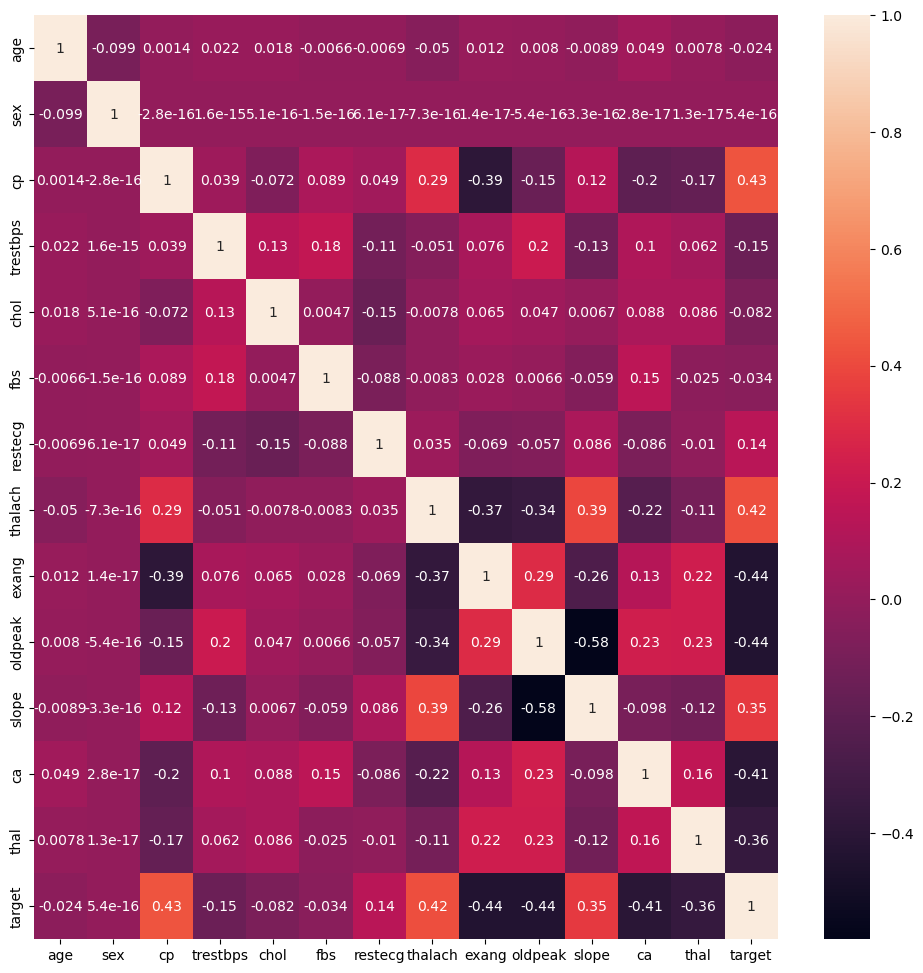

In [18]:
corrs = ht_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corrs, annot=True)
plt.show()

I think we can leave this one as is. Maybe drop Sex, fbs, and chol? Maybe scale?

## Stroke

In [19]:
stroke_df = pd.read_csv('data/ml_data/stroke_data.csv')

In [20]:
print(stroke_df.shape)
stroke_df.head()

(40910, 11)


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [21]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


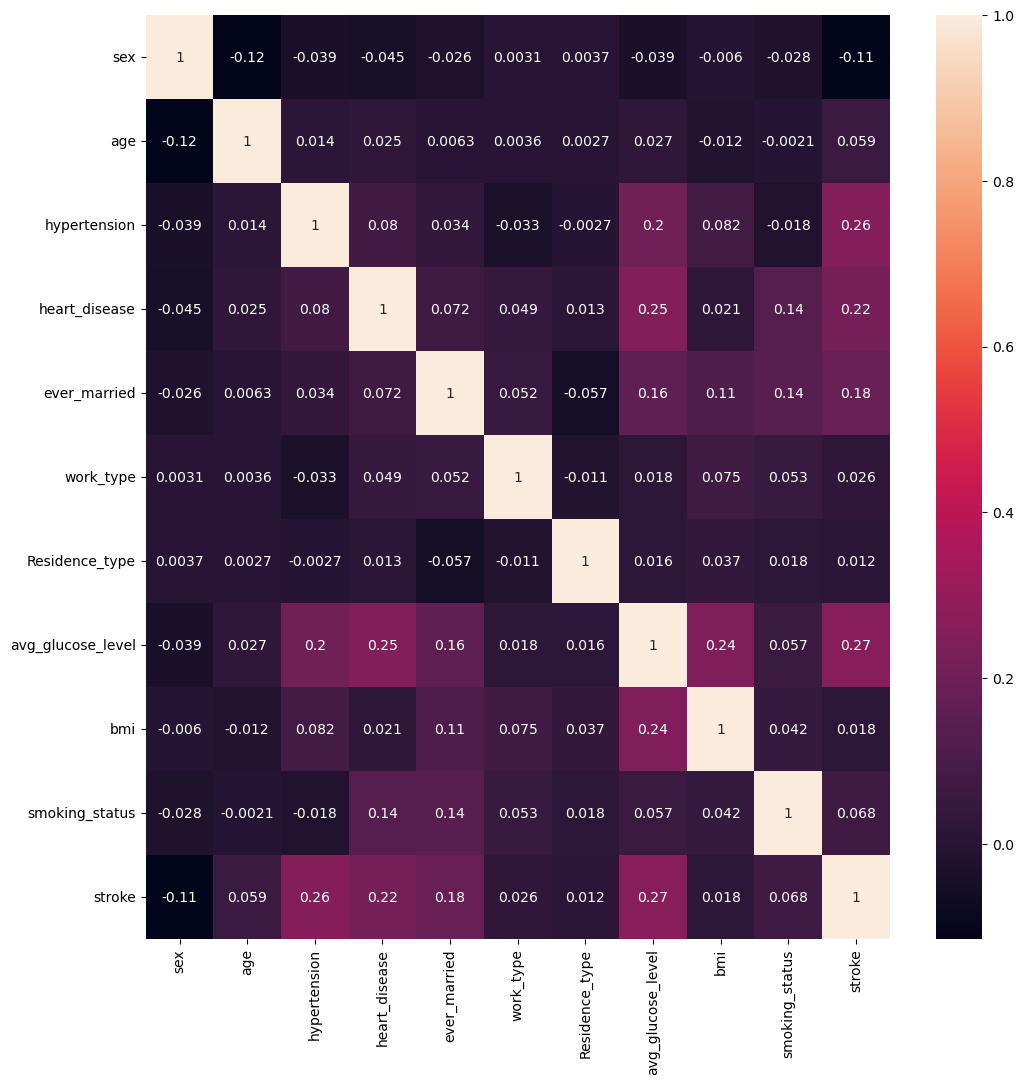

In [22]:
corrs = stroke_df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corrs, annot=True)
plt.show()

I think one can also be left as is. Maybe scale?